In [28]:
import pandas as pd
import numpy as np

train_path = "C:/Users/Sachin.R/Desktop/Sachin/Job/Santander Competition/train/train.csv"
test_path = "C:/Users/Sachin.R/Desktop/Sachin/Job/Santander Competition/test/test.csv"
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)



In [29]:
test = test.set_index(['ID_code'])
train = train.set_index(['ID_code'])

In [30]:
X = train.iloc[:,1:]
y = train.iloc[:,0:1]
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [20]:
x_test = test

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\Sachin.R\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[44256,   646],
       [ 3737,  1361]], dtype=int64)

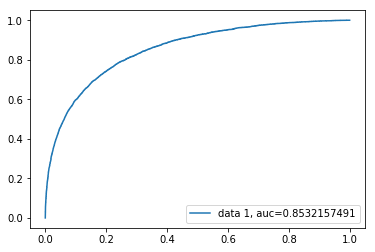

In [33]:
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.832


In [35]:
y_pred_proba_DT = clf.predict_proba(X_test)[::,1]
auc_DT = metrics.roc_auc_score(y_test, y_pred_proba_DT)
print(auc_DT)

0.553824929821
